In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.feature_selection import mutual_info_classif

# Unsupervised Data Preprocessing

## Load data and get an overview

Our dataset contains primary numeric features, except the first column (country name)

In [5]:
data = pd.read_csv("src/data sets/food.csv", index_col=0)
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'src/data sets/food.csv'

## Preprocess data using z-transformation

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(pd.DataFrame(data_scaled, columns=data.columns).head())

    RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals    Starch  \
0  0.082941  -1.794750 -2.224584 -1.179570 -1.225033  0.934804 -2.295965   
1 -0.282974   1.686446  1.245621  0.400468 -0.655111 -0.395051 -0.422218   
2  1.119699   0.387905  1.062979  0.055732  0.064791 -0.525246  0.889405   
3 -0.618396  -0.523837 -1.220051 -1.265754 -0.925074  2.273959 -1.983674   
4 -0.039031   0.968104 -0.124197 -0.662467 -0.685107  0.190830  0.452198   

       Nuts    Fr.Veg  
0  1.247968 -1.378251  
1 -0.910790  0.092789  
2 -0.499598 -0.076947  
3  0.322786  0.036210  
4 -1.013588 -0.076947  


## Perform a principal component analysis

In [5]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

## Plot the reduced dataset

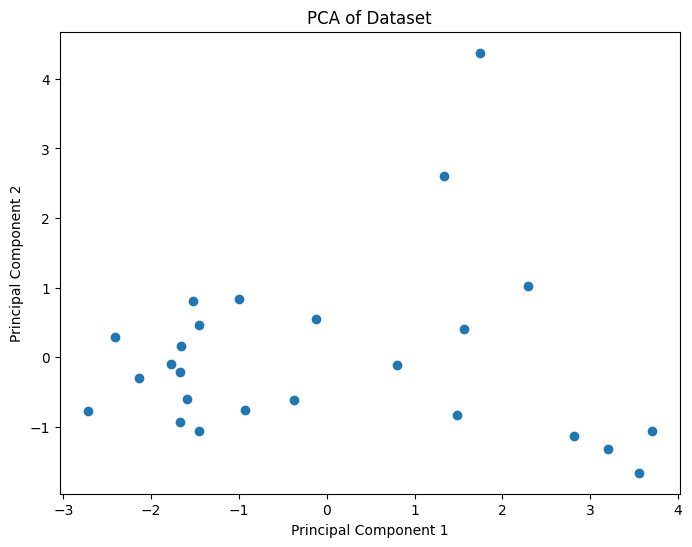

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

# Supervised Data Preprocessing

## Load data and get an overview

In [17]:
data_diabetes = pd.read_csv("../data sets/diabetes.csv")
data_diabetes_num = data_diabetes.iloc[:, :-1]
# Calculating IQR
iqrs = data_diabetes_num.apply(iqr)
q1 = data_diabetes_num.quantile(0.25)
q3 = data_diabetes_num.quantile(0.75)
# if value < q1 - 3 * IQR or value > q3 + 3 * IQR

## Supervised Feature Selection

In [18]:
X = data_diabetes.iloc[:, :-1]
y = data_diabetes.iloc[:, -1]
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
print(mi_scores.sort_values(ascending=False).head())

plas    0.110118
mass    0.073418
age     0.053036
insu    0.047419
preg    0.027021
Name: MI Scores, dtype: float64


## Boxplot Visualization of one highest and one lowest

<Figure size 1000x600 with 0 Axes>

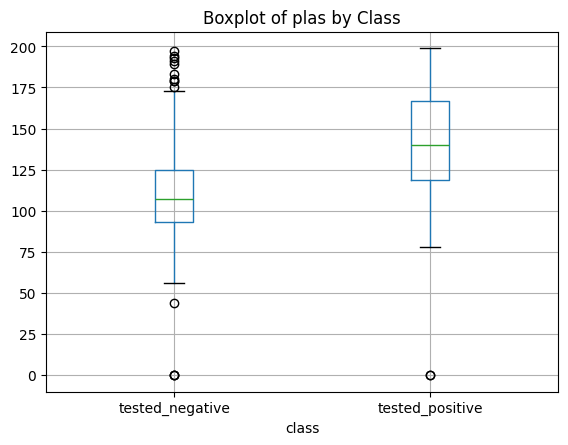

In [19]:
plt.figure(figsize=(10, 6))
# Assuming 'plas' has either the highest or lowest MI score
data_diabetes.boxplot(column='plas', by='class')
plt.title('Boxplot of plas by Class')
plt.suptitle('')
plt.show()